In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-05-05 18:37:33.170352: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28,1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0347 - val_accuracy: 0.9739 - val_loss: 0.0901
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9902 - loss: 0.0299 - val_accuracy: 0.9734 - val_loss: 0.0979
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9933 - loss: 0.0226 - val_accuracy: 0.9758 - val_loss: 0.0882
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9944 - loss: 0.0181 - val_accuracy: 0.9741 - val_loss: 0.0943
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9951 - loss: 0.0146 - val_accuracy: 0.9767 - val_loss: 0.0993


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9721 - loss: 0.0988
Test accuracy: 0.9775999784469604


In [8]:
n=550
predictions2 = [test_images[n:n+5],model.predict(test_images[n:n+5])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


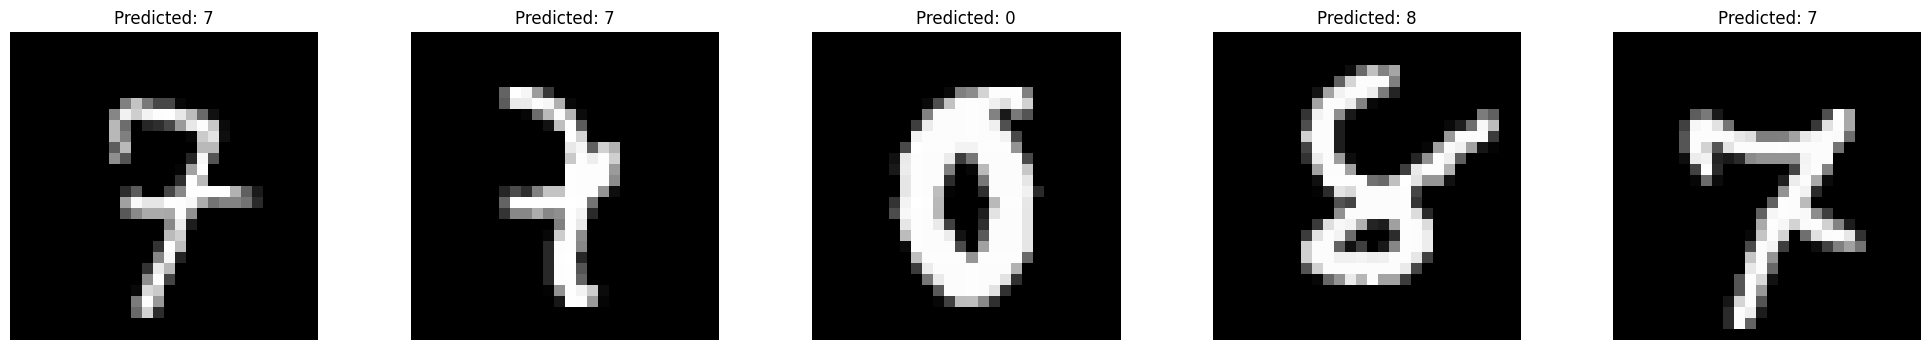

In [9]:
plt.figure(figsize=(25, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img_data = predictions2[0][i].reshape(28, 28)
    plt.imshow(img_data, cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions2[1][i])}')
    plt.axis('off')
plt.show()